<img src="pneumatic model.png">

eqn 1:


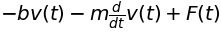

analytical solution:


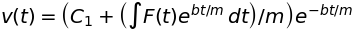

In [2]:
import sympy as sym
sym.init_printing()

'''Apply Newtons 2nd Law to mass'''
v, F = sym.symbols('v F', cls=sym.Function)
#Apply Newtons law to the mass
m, b, t = sym.symbols('m b t')
# b = sym.symbols('b')

print('eqn 1:')
eqn1 = F(t) - b*v(t) - sym.Derivative(v(t),t)*m
display(eqn1)

print('analytical solution:')
sym.dsolve(eqn1, v(t))

ideal gas law


eqn 2 (assume adibatic):


eqn 3:


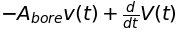

eqn 4:


In [3]:
'''write F(t) as a function of velocity
write out base equations'''

n,r,T = sym.symbols('n, r, T')
V, P = sym.symbols('V, P', cls=sym.Function)
print("ideal gas law")
display(P(t)*V(t) -n*r*T)
K_a = sym.symbols('K_a')
print('eqn 2 (assume adibatic):')
eqn2 = (P(t)*V(t)-K_a)
display(eqn2)

#Actuator volume
A_bore = sym.symbols('A_bore')
print('eqn 3:')
eqn3 = sym.Derivative(V(t),t) - v(t)*A_bore
display(eqn3)

#Actuator force
print('eqn 4:')
eqn4 = F(t) - P(t)*A_bore
display(eqn4)

eqn 5:


eqn 6:


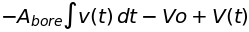

eqn 7:


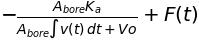

eqn 8:


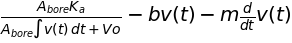

eqn 9:


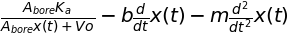

In [4]:
'''we want F(t) in our original equation to be in terms of v(t)'''

#sub 2 into 4"
print('eqn 5:')
eqn5 = eqn4.subs({P(t):sym.solve(eqn2,P(t))[0]})
display(eqn5)

#integrate 3
#tank initial Volume
Vo = sym.symbols('Vo')
#actuator initial position, but we'll zero it out
xo = sym.symbols('xo')
print('eqn 6:')
#I'm skeptical. Why aren't we seeing V(t) = Vo + A*x(t)?
"""manually fix"""
eqn6 = -A_bore*sym.Integral(v(t),t) + V(t) -Vo
display(eqn6)

#sub 6 into 5
print('eqn 7:')
eqn7 = eqn5.subs({V(t):sym.solve(eqn6,V(t))[0]})
display(eqn7)
sol = (sym.solve(eqn7, F(t))[0])

#sub 7 into 1
print('eqn 8:')
eqn8 = eqn1.subs({F(t):sym.solve(eqn7,F(t))[0]})
display(eqn8)

#write in terms of x(t)
x = sym.symbols('x', cls=sym.Function)

print('eqn 9:')
eqn9 = eqn8.subs({sym.Integral(v(t),t):x(t), v(t): sym.Derivative(x(t),t)})  
display(eqn9)

---------------------------Just showing standard form--------------------------------
eqn 10:


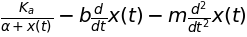

eqn 11:


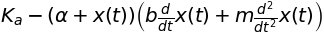

eqn 12:


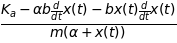

---------------------------Just showing standard form--------------------------------
eqn 13:


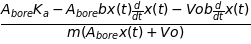

In [5]:
'''get eqn in standard form'''
print("---------------------------Just showing standard form--------------------------------")
#take alpha = -Vo/A
alpha = sym.symbols('alpha')
eqn10 = K_a/(x(t)+alpha) - b*sym.Derivative(x(t),t)-m*sym.Derivative(x(t),t,t)
print('eqn 10:')
display(eqn10)

#multiply through to coerce function into standard form
eqn11 = eqn10*(alpha+x(t))
print('eqn 11:')
display(sym.simplify(eqn11))

#solve eqn11 in terms of the double derivative
print('eqn 12:')
eqn12 = sym.solve(eqn11, sym.Derivative(x(t),t,t))[0]
display(eqn12)
print("---------------------------Just showing standard form--------------------------------")

#I actually want to see where A_bore and Vo end up in this form
print('eqn 13:')
eqn13 = sym.solve(eqn9, sym.Derivative(x(t),t,t))[0]
display(eqn13)

In [6]:
'''calcs on existing system to determine variables'''
# from pint import UnitRegistry
# ureg = UnitRegistry()
# #calculate the a constant
# D_tank = 2.5*12
# L_tank = 4*12
# V_tank = D_tank**2*np.pi/4*L_tank*ureg.inch**3
# V_tank.to(ureg.meter**3)
# P_tank = 100*ureg.lbf/ureg.inch**2
# P_tank.to(ureg.newton/ureg.meter**2)
# K_tank = P_tank*V_tank
# print("a constant")
# display(K_tank)


'calcs on existing system to determine variables'

In [34]:
'''solve numerically.
v(t) = x'(t)
'''
# %matplotlib inline
%matplotlib qt 

from scipy.integrate import odeint
import numpy as np

N_lbf = 4.44
in_m = 39.37

Vo = 0.118 #m^3, changed the revolve and measured in solidworks
Po = 50.0*N_lbf*in_m**2
K_a = Vo*Po
D_bore = 3.25 #inch
A_bore = (D_bore/in_m/2)**2*np.pi
b = 0 #500 matched well
m = 40.8 #kg, from biocore
alpha = -Vo/A_bore
q = 1000 #1000 matched well. y-intercept for soil

def model(x,t):
    y = x[0]
    dy = x[1]
    xdot = [[],[]]
    xdot[0] = dy
#     xdot[1] = (A_bore*K_a-A_bore*b*y*dy-Vo*b*dy)/(m*(A_bore*y+Vo)) old soil model
    xdot[1] = (A_bore*K_a-A_bore*b*y*dy-A_bore*q*y-Vo*b*dy-Vo*q)/(m*(A_bore*y+Vo))
    print("at time {:.3f} we have".format(t))
    print(x)
    return xdot
time = np.linspace(0,.2,10)
z2 = odeint(model, [0,0],time)
# print(time)
# print(z2)
x_goal = max(z2[:,0])/.2*100

print("you've gotten to {:.1f} percent of your target distance".format(x_goal))

at time 0.000 we have
[0. 0.]
at time 0.000 we have
[0.00000000e+00 5.08692542e-05]
at time 0.000 we have
[1.25439394e-10 5.08692542e-05]
at time 0.000 we have
[2.50878789e-10 1.01738508e-04]
at time 0.000 we have
[3.76318183e-10 1.01738508e-04]
at time 0.001 we have
[1.38730376e-05 2.39241882e-02]
at time 0.001 we have
[1.38730376e-05 2.39241719e-02]
at time 0.002 we have
[5.52560069e-05 4.77465726e-02]
at time 0.002 we have
[5.52559880e-05 4.77465401e-02]
at time 0.003 we have
[0.00012415 0.07156881]
at time 0.003 we have
[0.00012415 0.07156878]
at time 0.010 we have
[0.00109879 0.2129111 ]
at time 0.010 we have
[0.00109878 0.21291062]
at time 0.008 we have
[0.00062967 0.16117642]
at time 0.008 we have
[0.00062966 0.16117622]
at time 0.004 we have
[0.00019411 0.0894906 ]
at time 0.004 we have
[0.00019411 0.08949059]
at time 0.005 we have
[0.00027965 0.10741226]
at time 0.005 we have
[0.00027965 0.10741227]
at time 0.006 we have
[0.00038075 0.12533378]
at time 0.006 we have
[0.0003807

In [26]:
V = []
F_cleat = []
F_actuator = []
F_inertia = []
F_actuator2 = []
P = []
PtimesV = []
a = []
t_impact = []

for index, i in enumerate(z2):
    x = i[0]
    v = i[1]
#     ai = (A_bore*K_a-A_bore*b*x*v-Vo*b*v)/(m*(A_bore*x+Vo)) old soil model
    ai = (A_bore*K_a-A_bore*b*x*v-A_bore*q*x-Vo*b*v-Vo*q)/(m*(A_bore*x+Vo))
    Vi = Vo + x*A_bore
    Pi = K_a/Vi
#     F_cleati = b*v old soil model
    F_cleati = q+b*v
    F_actuatori = Pi*A_bore
    F_inertiai = ai*m
    
    a.append(ai)
    V.append(Vi)
    P.append(Pi)    
    F_cleat.append(F_cleati)
    F_actuator.append(F_actuatori)
    F_inertia.append(F_inertiai)
    
    if x>.200:
        t_impact.append(time[index])
    else:
        pass

print('you reached 200mm in {:.2f} seconds'.format(t_impact[0]))

you reached 200mm in 0.16 seconds


In [27]:
"""plot results"""

import matplotlib.pyplot as plt
plt.close()
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, gridspec_kw={'hspace':1})
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)

# plt.plot(time, z2[:,1],'r-')

ax1.plot(time, z2[:,0],'g-')
ax1.set_title("Distance")
ax1.set_ylabel("Distance (m)")

ax2.plot(time,z2[:,1])
ax2.set_title("Velocity")
ax2.set_ylabel("velocity (m/s)")


ax3.set_title("Forces")
ax3.set_ylabel("F (N)")

ax3.plot(time,F_cleat, 'r-', label = "F_cleat")
# ax3.plot(time,F_actuator)
ax3.plot(time,F_inertia, label = "F_inertia")
ax3.plot(time,F_actuator, label = "F_actuator")
ax3.legend()

ax4.plot(time,P)
ax4.set_title("Pressure")
ax4.set_ylabel("pressure (Pa)")

ax5.plot(time,V,'y-')
ax5.set_title("Volume")
ax5.set_ylabel("volume (m^3)")

ax6.plot(time, a)

fig.subplots_adjust(hspace=.5, right=.6, top = .95, bottom = .05)

In [ ]:
"""rewrite equation 1 to have a slope intercept for force as a function of velocity"""

'''Apply Newtons 2nd Law to mass'''
v, F = sym.symbols('v F', cls=sym.Function)
#Apply Newtons law to the mass
m, b, t, q = sym.symbols('m b t q')

print('eqn 1:')
print("treat q as friction and r as a term that accounts for soil gliding")
eqn1 = F(t) - q - b*v(t) - sym.Derivative(v(t),t)*m
display(eqn1)

#rewrite equation 8
#sub 7 into 1
print('eqn 8.2:')
eqn8 = eqn1.subs({F(t):sym.solve(eqn7,F(t))[0]})
display(eqn8)

#write in terms of x(t)
x = sym.symbols('x', cls=sym.Function)

print('eqn 9.2:')
eqn9 = eqn8.subs({sym.Integral(v(t),t):x(t), v(t): sym.Derivative(x(t),t)})  
display(eqn9)

#I actually want to see where A_bore and Vo end up in this form
print('eqn 13.2:')
eqn13 = sym.solve(eqn9, sym.Derivative(x(t),t,t))[0]
display(eqn13)



In [ ]:
#postprocess

deltaP = ((max(P)-min(P))/max(P)*100)
deltaV = ((max(V)-min(V))/max(V)*100)
print("your pressure and volume changed {:.2f} percent".format(deltaP))

eqn 1:
treat q as friction and r as a term that accounts for soil gliding


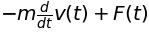

eqn 8.2:


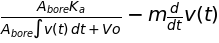

eqn 9.2:


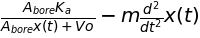

equation for x < x_knee


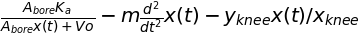

equation for x > x_knee


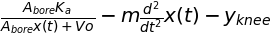

solving for acceleration when x < x_knee
eqn 13:


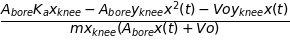

solving for acceleration when x > x_knee
eqn 13.2:


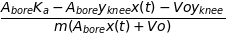

In [17]:
"""rewrite equation 1 to use Mohr-Coulomb soil model"""

'''Apply Newtons 2nd Law to mass'''
v, F = sym.symbols('v F', cls=sym.Function)
#Apply Newtons law to the mass
m, b, t, q = sym.symbols('m b t q')

print('eqn 1:')
print("treat q as friction and r as a term that accounts for soil gliding")
eqn1 = F(t)  - sym.Derivative(v(t),t)*m
display(eqn1)

#rewrite equation 8
#sub 7 into 1
print('eqn 8.2:')
eqn8 = eqn1.subs({F(t):sym.solve(eqn7,F(t))[0]})
display(eqn8)

#write in terms of x(t)
x = sym.symbols('x', cls=sym.Function)

print('eqn 9.2:')


eqn9 = eqn8.subs({sym.Integral(v(t),t):x(t), v(t): sym.Derivative(x(t),t)})  
display(eqn9)

#add in M-C soil model

x_knee = sym.symbols('x_knee')
y_knee = sym.symbols('y_knee')

#equation for x < x_knee
print('equation for x < x_knee')
eqn9_2 = eqn9 - y_knee/x_knee*x(t)
display(eqn9_2)

#equation for x > x_knee
print('equation for x > x_knee')
eqn9_3 = eqn9 -y_knee
display(eqn9_3)

#I actually want to see where A_bore and Vo end up in this form
print('solving for acceleration when x < x_knee')
print('eqn 13:')
eqn13 = sym.solve(eqn9_2, sym.Derivative(x(t),t,t))[0]
display(eqn13)

print('solving for acceleration when x > x_knee')
print('eqn 13.2:')
eqn13_2 = sym.solve(eqn9_3, sym.Derivative(x(t),t,t))[0]
display(eqn13_2)